In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as pl


import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics





In [3]:
df=pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


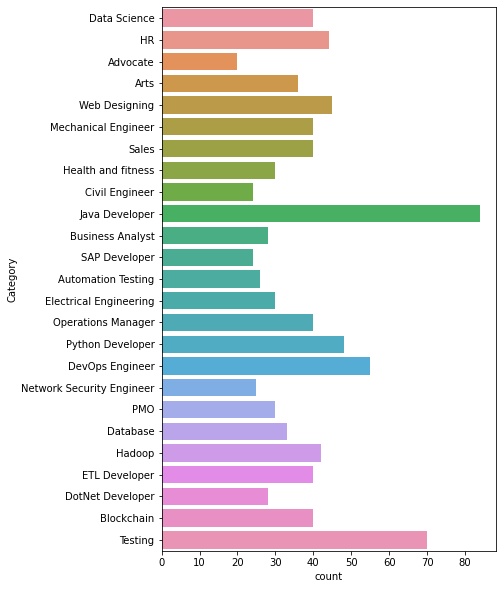

In [4]:
pl.figure(figsize=(6,10))
sns.countplot(y=df['Category'])
pl.show()

In [5]:
df.columns

Index(['Category', 'Resume'], dtype='object')

In [6]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

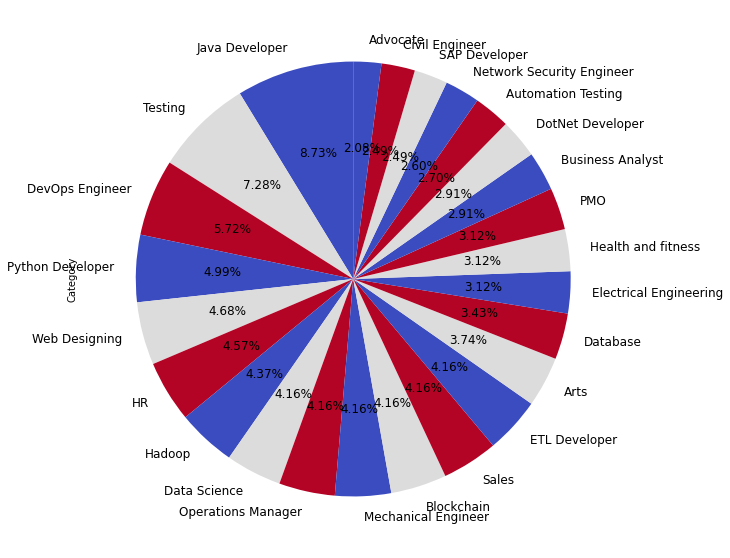

In [12]:
df['Category'].value_counts().plot(kind='pie',figsize=(10,10),
                                  startangle=90,
                                  autopct="%0.2f%%",
                                  fontsize=12,
                                  colors=colors)

In [10]:
from matplotlib.gridspec import GridSpec
targetCounts=df['Category'].value_counts()
targetlabels=df['Category'].value_counts().keys()

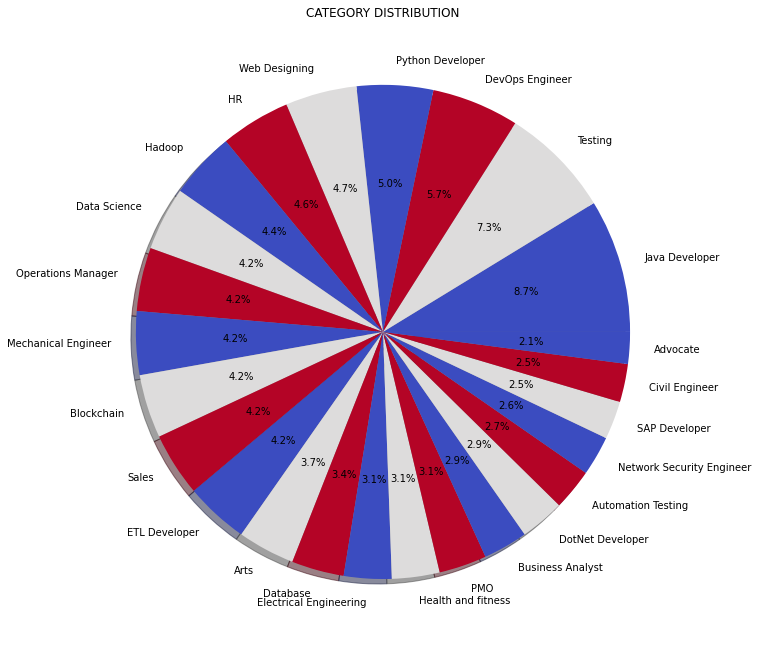

In [11]:
pl.figure(1,figsize=(25,25))
cmap=pl.get_cmap('coolwarm')
the_grid = GridSpec(2, 2)
colors=[cmap(i) for i in np.linspace(0,1,3)]
pl.subplot(the_grid[0,1],aspect=1,title='CATEGORY DISTRIBUTION')
source_pie=pl.pie(targetCounts,labels=targetlabels,autopct="%1.1f%%",
                 shadow=True,colors=colors)
pl.show()

In [13]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
df['cleaned_resume'] = df.Resume.apply(lambda x: cleanResume(x))

In [14]:
df.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [15]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [16]:
oneSetofWords=set(stopwords.words('english')+['``',"''"])
totalWords=[]
Sentences=df['Resume'].values
cleanedSentences=""
for i in range(0,160):
    cleanedText=cleanResume(Sentences[i])
    cleanedSentences+=cleanedText
    requiredwords=nltk.word_tokenize(cleanedText)
    for word in requiredwords:
        if word not in oneSetofWords and word not in string.punctuation:
            totalWords.append(word)

In [24]:
wordfreqdist=nltk.FreqDist(cleanedSentences)
wordfreqdist.items()

dict_items([('S', 2944), ('k', 1504), ('i', 19530), ('l', 9174), ('s', 14444), (' ', 43006), ('P', 1706), ('r', 14664), ('o', 15910), ('g', 5424), ('a', 20084), ('m', 5838), ('n', 19392), ('L', 1362), ('u', 5604), ('e', 25428), ('y', 3736), ('t', 18228), ('h', 6208), ('p', 6396), ('d', 7876), ('c', 8566), ('b', 2160), ('q', 308), ('J', 596), ('v', 2706), ('Q', 238), ('M', 1616), ('R', 1060), ('V', 322), ('N', 930), ('B', 918), ('K', 326), ('F', 450), ('D', 1700), ('T', 1694), ('C', 1848), ('A', 2018), ('W', 414), ('E', 1686), ('z', 272), ('H', 658), ('3', 192), ('j', 516), ('O', 570), ('x', 982), ('6', 294), ('f', 3430), ('G', 430), ('Y', 196), ('I', 1352), ('2', 790), ('4', 188), ('w', 1890), ('U', 492), ('X', 118), ('0', 772), ('1', 848), ('7', 134), ('5', 158), ('9', 144), ('8', 156), ('Z', 4)])

In [26]:
wordfreqdist.most_common(10)

[(' ', 43006),
 ('e', 25428),
 ('a', 20084),
 ('i', 19530),
 ('n', 19392),
 ('t', 18228),
 ('o', 15910),
 ('r', 14664),
 ('s', 14444),
 ('l', 9174)]

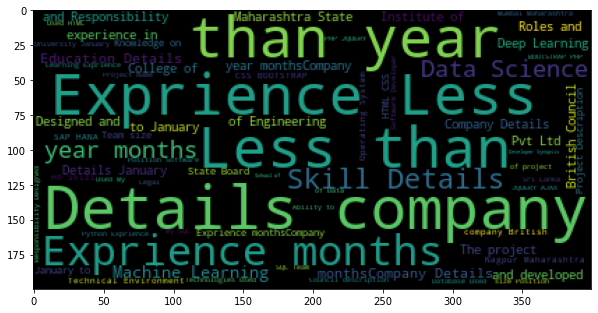

In [33]:
wc=WordCloud().generate(cleanedSentences)
pl.figure(figsize=(10,8))
pl.imshow(wc)
pl.show()